# Data Science Bookcamp

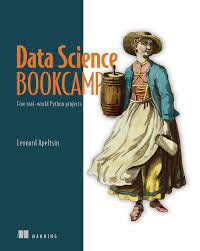

Code for solving case studies from Manning's [Data Science Bookcamp](https://www.manning.com/books/data-science-bookcamp) - book received Nov 11 2021, $39.95 including shipping (from Sep 9 2019 MEAP order).

## Chapter 5 - Basic Probability and Statistical Analysis using SciPy

In [1]:
from scipy import stats

In [2]:
num_heads = 16
num_flips = 20
prob_head = 0.5
prob = stats.binomtest(num_heads, num_flips, prob_head) # binom_test deprecated
print(f"Probability of observing {num_heads} or more heads or tails is {prob.pvalue:.7f}") # returns class

Probability of observing 16 or more heads or tails is 0.0118179


In [3]:
prob_16_heads = stats.binom.pmf(num_heads, num_flips, prob_head)
print(f"The probability of obtaining exactly {num_heads} heads or tails in {num_flips} flips is {prob_16_heads}")

The probability of obtaining exactly 16 heads or tails in 20 flips is 0.004620552062988283


In [4]:
probabilities = stats.binom.pmf([4,16], num_flips, prob_head)
assert probabilities.tolist() == [prob_16_heads] * 2

In [5]:
interval_all_counts = range(21)
probabilities = stats.binom.pmf(interval_all_counts, num_flips, prob_head)
total_prob = probabilities.sum()
print(f"Sum of probabilities = {total_prob:.14f} - it's exact value is {total_prob}, but that is due to representation errors")

Sum of probabilities = 1.00000000000000 - it's exact value is 0.9999999999999998, but that is due to representation errors


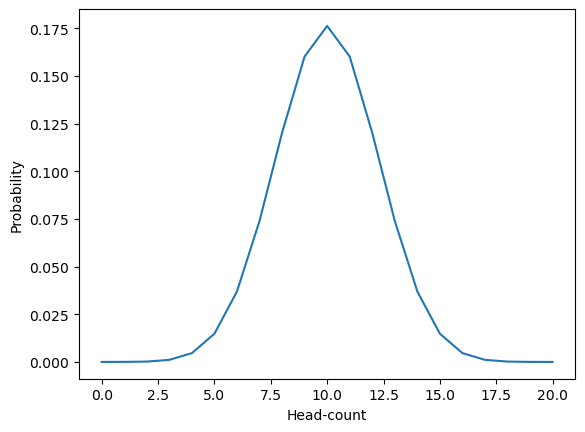

In [6]:
import matplotlib.pyplot as plt
plt.plot(interval_all_counts, probabilities)
plt.xlabel("Head-count")
plt.ylabel("Probability")
plt.show()

When using different numbers of coin flips, this is how the distribution changes:

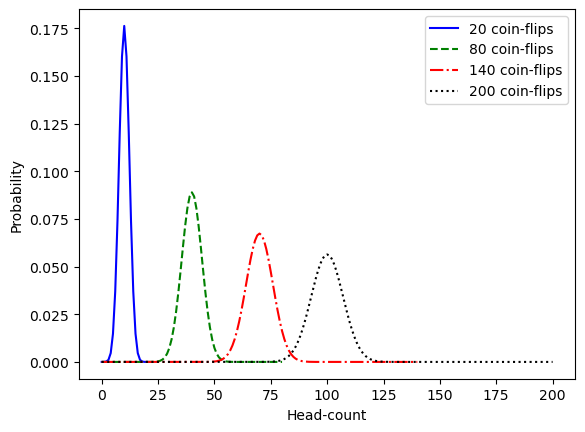

In [7]:
flip_counts = [20, 80, 140, 200]
line_styles = ['-', '--', '-.', ':']
colors = ['b', 'g', 'r', 'k']
for num_flips, linestyle, color in zip(flip_counts,line_styles, colors):
    x_values = range(num_flips+1)
    y_values = stats.binom.pmf(x_values, num_flips, prob_head)
    plt.plot(x_values, y_values, linestyle=linestyle,color=color, label=f"{num_flips} coin-flips")
plt.legend()
plt.xlabel('Head-count')
plt.ylabel('Probability')
plt.show()

## Mean as a measure of centrality

In [8]:
import numpy as np
measurements = np.array([80,77,73,61,74,79,81])

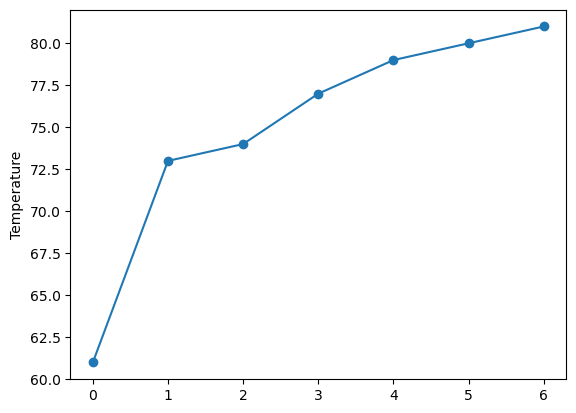

In [9]:
measurements.sort()  # in-place sorting
number_of_days = measurements.size
plt.plot(range(number_of_days), measurements)
plt.scatter(range(number_of_days), measurements)
plt.ylabel("Temperature")
plt.show()

In [10]:
difference = measurements.max() - measurements.min()
midpoint = measurements.min() + difference / 2
assert midpoint == (measurements.max() + measurements.min())/2
print(f"The midpoint is {midpoint} degrees")

The midpoint is 71.0 degrees


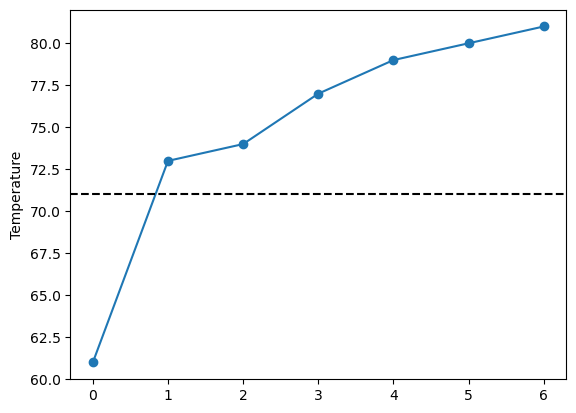

In [11]:
plt.plot(range(number_of_days), measurements)
plt.scatter(range(number_of_days), measurements)
plt.axhline(midpoint,color='k', linestyle='--')
plt.ylabel("Temperature")
plt.show()

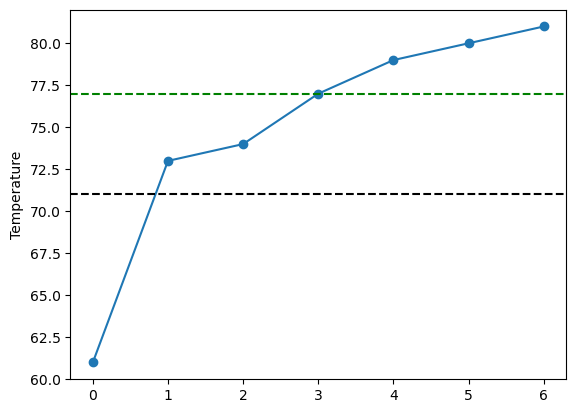

The midpoint is 71.0 degrees
The median temperature is 77 degrees


In [12]:
median = measurements[3]
plt.plot(range(number_of_days), measurements)
plt.scatter(range(number_of_days), measurements)
plt.axhline(midpoint,color='k', linestyle='--',label="midpoint")
plt.axhline(median,color='g', linestyle='--',label="median")
plt.ylabel("Temperature")
plt.show()
print(f"The midpoint is {midpoint} degrees")
print(f"The median temperature is {median} degrees")

The remainder of chapter 5 is not very interesting and the final outcome is to use the mean as a measure for centrality and the variance or standard deviation as a measure for data dispersion.

## Chapter 6 - Making predictions using the central limit theorem and SciPy